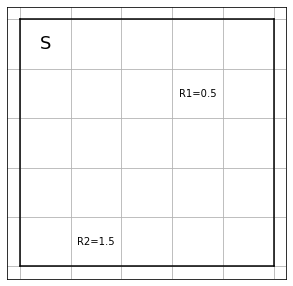

In [ ]:
import matplotlib.pyplot as plt

start = 0
R1_spot = 8
R1_size = 0.5
R2_spot = 21
R2_size = 1.5
episode_count = 300
epoch_count = 200

plt.figure(figsize=(5, 5))
# Walls
plt.plot([0, 5], [5, 5], color='k')
plt.plot([0, 5], [0, 0], color='k')
plt.plot([0, 0], [0, 5], color='k')
plt.plot([5, 5], [0, 5], color='k')

# Display start point, reward locations, and sizes
plt.text(0.5 , 4.5, 'S', size=18, ha='center', va='center')
plt.text(0.5 + R1_spot%5, 4.5 - int(R1_spot/5), 'R1=' + str(R1_size), size=10, ha='center', va='center')
plt.text(0.5 + R2_spot%5, 4.5 - int(R2_spot/5), 'R2=' + str(R2_size), size=10, ha='center', va='center')
# plt.text(4.5, 4.5, 'G', size=18, ha='center', va='center')

# Hide ticks and frame
plt.tick_params(axis='both', which='both', bottom='', top= '', labelbottom='', right='', left='', labelleft='')
plt.grid('True')

In [ ]:
## Single Reward
import numpy as np
from environment import Maze
from agent import Agent
from tqdm import tqdm
global total_reward1, total_reward2, n, episode_count


def train(i):
    kernel = 2 # Thickness of the outer wall of the maze (extension)
    start = [1, 1] # Specify the start position
    goal_1 = [2, 4] # Specify the goal position
    goal_2 = [5, 2]

    """Automatically generate a maze"""
    
    env = Maze(5, 5) # Specify the size of the maze
    env.set_out_wall() # Surround the maze with walls
    #env.set_inner_wall_boutaosi() # Automatically generate inner walls
    env.set_start_goal(start, goal_1, goal_2) # Specify start and goal positions
    env.bg_maze(kernel) # Expand the maze cells by the kernel amount

    """Generate an agent in the environment and train"""
    
    for e in tqdm(range(1, n+1)):
#     for e in range(1, n+1):
        agent = Agent(env.maze, i)
        goal1, goal2 = env.run(agent, e, episode_count, i)
        for ee, st in enumerate(goal1):
            total_reward1[i-1][e-1][ee] = st
        for ee, st in enumerate(goal2):
            total_reward2[i-1][e-1][ee] = st
        
#         if e == n:
#             env.result_plot(e, episode_count)
    print('Finish')
    return

if __name__ == "__main__":
    n = 200 # Number of episode trials
    episode_count = 300 # Number of episodes
    total_reward1 = np.zeros([9, n, episode_count])
    total_reward2 = np.zeros([9, n, episode_count])
    for i in range(1, 10): # Size parameter for global indirect path        
        train(i)
        
#     print(total_reward1)


### 標準偏差算出用
bg1 : 近い小さい報酬
bg2 : 遠い大きい報酬

In [2]:
import numpy as np

sample_range = 9 #9

std_list_bg1 = np.zeros([n,sample_range]) # n = session数
std_list_bg2 = np.zeros([n,sample_range])

for i in range(sample_range):
    for j in range(len(std_list_bg1)):
        std_list_bg1[j][i] = sum(total_reward1[i][j][50:]) #50
        std_list_bg2[j][i] = sum(total_reward2[i][j][50:])
        
std_list_bg1 = std_list_bg1 / (episode_count-sample_range)
std_list_bg2 = std_list_bg2 / (episode_count-sample_range)

ave_bg1 = np.mean(std_list_bg1, axis=0)
ave_bg2 = np.mean(std_list_bg2, axis=0)


sigma_bg1 = np.std(std_list_bg1, axis=0)
sigma_bg2 = np.std(std_list_bg2, axis=0)

print(ave_bg1)
print(sigma_bg1)
print(ave_bg2)
print(sigma_bg2)

[0.60821306 0.60536082 0.59302405 0.53785223 0.49199313 0.4352921
 0.37728522 0.33158076 0.31151203]
[0.02923587 0.02844863 0.02704428 0.03456809 0.03414554 0.0276736
 0.03017133 0.02797046 0.02543826]
[0.41584192 0.41869416 0.43103093 0.48620275 0.53206186 0.58876289
 0.64676976 0.69247423 0.71254296]
[0.02923587 0.02844863 0.02704428 0.03456809 0.03414554 0.0276736
 0.03017133 0.02797046 0.02543826]


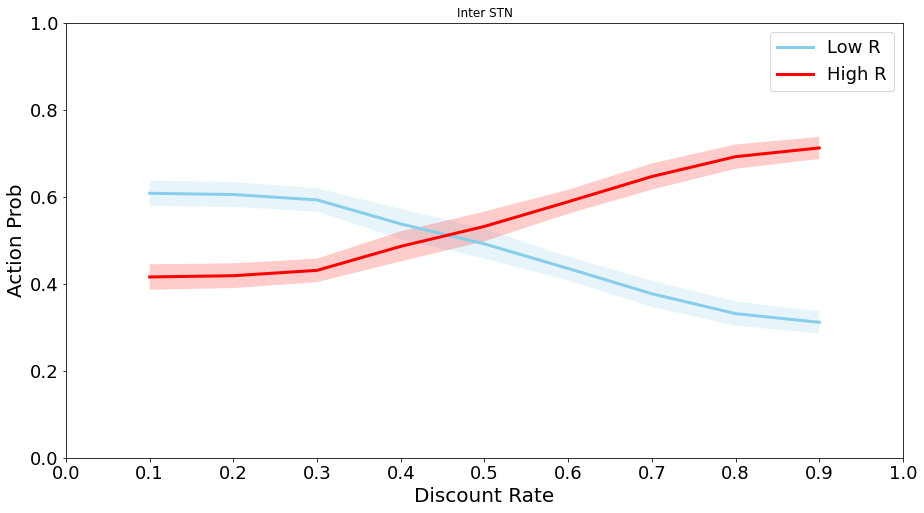

In [3]:
# import numpy as np
import matplotlib.pyplot as plt

x = np.arange(9)
w = 0.04



fig, ax = plt.subplots(figsize=(15,8))
ax.plot(x, ave_bg1, lw=3, color='skyblue', label='Low R')
ax.fill_between(x, ave_bg1+sigma_bg1, ave_bg1-sigma_bg1, facecolor='skyblue', alpha=0.2)
ax.plot(x, ave_bg2, lw=3, color='red', label='High R')
ax.fill_between(x, ave_bg2+sigma_bg2, ave_bg2-sigma_bg2, facecolor='red', alpha=0.2)

ax.set_xticks([-1,0,1,2,3,4,5,6,7,8,9])
ax.set_xticklabels(['0.0','0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9','1.0'])
ax.set_ylim(0,1)
ax.set_xlim(-1,9)
ax.tick_params(labelsize=18)
ax.set_xlabel('Discount Rate', fontsize=20)
ax.set_ylabel('Action Prob', fontsize=20)
ax.legend(fontsize=18)
ax.set_title('Inter STN')
plt.savefig('inter_stn.svg')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# CSV読み込み
for j in range(1,10): #discount rate
    log_heatmap_data = np.zeros([200,5,5])
    for i in range(1,6): #epoch
        df = pd.read_csv("sample{}-{}.csv".format(j, i)) 

        # カラムの組み合わせを生成
        target_cols = [f"wstn{i}{j}" for i in range(2, 7) for j in range(2, 7)]

        # episode ごとに最大値をとる
        result = df.groupby("episode")[target_cols].max()

        # 表示したい episode を選ぶ（例：最初の1つ）
        episode_id = result.index[299]
        values = result.loc[episode_id]

        # 行と列のインデックスを抽出する正規表現パターン
        pattern = r'^wstn(\d)(\d)$'

        # 行と列のインデックスのセットを作成
        rows = set()
        cols = set()
        valid_data = {}

        for key, val in values.items():
            match = re.match(pattern, key)
            if match:
                row = int(match.group(1))
                col = int(match.group(2))
                rows.add(row)
                cols.add(col)
                valid_data[key] = val
            else:
                print(f"Warning: Invalid key format '{key}'. Skipping.")

        # ソートされた行と列のインデックスのリストを作成
        sorted_rows = sorted(list(rows))
        sorted_cols = sorted(list(cols))
        num_rows = len(sorted_rows)
        num_cols = len(sorted_cols)
        heatmap_data = np.zeros((num_rows, num_cols))

        # 行と列のインデックスのマッピングを作成
        row_mapping = {row: i for i, row in enumerate(sorted_rows)}
        col_mapping = {col: j for j, col in enumerate(sorted_cols)}

        # ヒートマップのデータを埋める
        for key, val in valid_data.items():
            match = re.match(pattern, key)
            if match:
                row = int(match.group(1))
                col = int(match.group(2))
                if row in row_mapping and col in col_mapping:
                    heatmap_data[row_mapping[row], col_mapping[col]] = val

        log_heatmap_data[i-1] = heatmap_data 

    plt.figure()
    sns.heatmap(np.mean(log_heatmap_data,axis=0), annot=False, fmt=".1f", cmap="Greens",
                xticklabels=[f'j={col}' for col in sorted_cols],
                yticklabels=[f'i={row}' for row in sorted_rows],square=True)
    plt.title('Heatmap of wstn_ij')
    plt.xlabel('j')
    plt.ylabel('i')
    plt.show()

    print(np.mean(log_heatmap_data,axis=0))

In [30]:
import numpy as np
import sys
after_50_1 = []
after_50_2 = []

for i in range(9):
    tmp1 = 0
    tmp2 = 0
    for j in range(1):
        cal1 = np.sum(total_reward1[i][j][50:])
        cal2 = np.sum(total_reward2[i][j][50:])
        tmp1 += cal1
        tmp2 += cal2
        
        
    after_50_1.append(tmp1)
    after_50_2.append(tmp2)
    
after_50_1 = np.array(after_50_1)
after_50_2 = np.array(after_50_2)

print(after_50_1)
print(after_50_2)

[ 65.  69.  77.  83. 114. 127. 140. 148. 149.]
[185. 181. 173. 167. 136. 123. 110. 102. 101.]


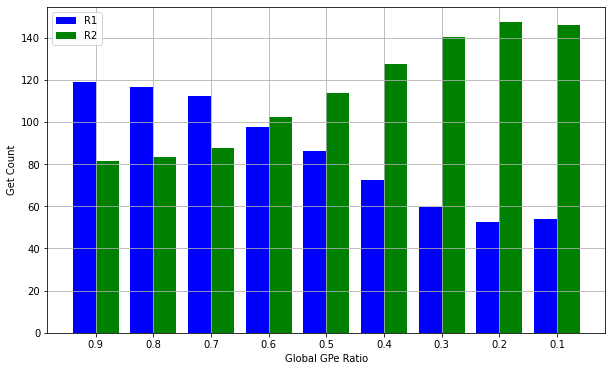

In [31]:
import matplotlib.pyplot as plt

# X軸のデータ
x = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

# グラフの幅
w = 0.04

# グラフの大きさ指定
plt.figure(figsize = (10, 6))

# グラフの描画。y2の方はグラフの幅の分、右にずらして描画する 
plt.bar(x, np.sum(std_list_bg1,axis=0), color = 'blue', width = w, label = 'R1', align = 'center')
plt.bar(x + w, np.sum(std_list_bg2,axis=0), color='green', width = w, label = 'R2', align = 'center')

# 凡例を最適な位置に配置
plt.legend(loc = 'best')

plt.xticks(x + w / 2, ['0.9', '0.8', '0.7', '0.6', '0.5', '0.4', '0.3', '0.2', '0.1'])
plt.xlabel('Global GPe Ratio')
plt.ylabel('Get Count')
plt.grid(True)

### ここまでが算出用

In [8]:
print(total_reward1)
print(total_reward2)
print(len(total_reward1))
print(len(total_reward1[0]))
print(len(total_reward1[0][0]))
print(total_reward1[0][0])
print(sum(total_reward1))
print(sum(total_reward1[8][199][50:]))
print(sum(total_reward2[8][199][50:]))
tmp_list = []
for i in range(200):
    a = (sum(total_reward1[8][i][50:])) + (sum(total_reward2[8][i][50:]))
    tmp_list.append(a)
print(sum(tmp_list))

[[[0. 0. 0. ... 1. 1. 1.]]

 [[0. 1. 0. ... 1. 1. 1.]]

 [[1. 1. 0. ... 1. 1. 1.]]

 ...

 [[1. 1. 0. ... 0. 0. 0.]]

 [[1. 0. 1. ... 0. 0. 1.]]

 [[1. 0. 0. ... 1. 1. 1.]]]
[[[1. 1. 1. ... 0. 0. 0.]]

 [[1. 0. 1. ... 0. 0. 0.]]

 [[0. 0. 1. ... 0. 0. 0.]]

 ...

 [[0. 0. 1. ... 1. 1. 1.]]

 [[0. 1. 0. ... 1. 1. 0.]]

 [[0. 1. 1. ... 0. 0. 0.]]]
9
1
300
[0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1.
 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0.
 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0.
 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1.

IndexError: index 199 is out of bounds for axis 0 with size 1

In [9]:
import numpy as np
import sys
after_50_1 = []
after_50_2 = []

for i in range(9):
    tmp1 = 0
    tmp2 = 0
    for j in range(1):
        cal1 = np.sum(total_reward1[i][j][50:])
        cal2 = np.sum(total_reward2[i][j][50:])
        tmp1 += cal1
        tmp2 += cal2
        
    after_50_1.append(tmp1)
    after_50_2.append(tmp2)
    
after_50_1 = np.array(after_50_1)
after_50_2 = np.array(after_50_2)

print(after_50_1)
print(after_50_2)

[135. 142. 158. 130. 144. 139. 130. 141. 166.]
[115. 108.  92. 120. 106. 111. 120. 109.  84.]


In [10]:
import numpy as np

tot1 = np.array(total_reward1)
tot2 = np.array(total_reward2)
ave1 = np.mean(tot1, axis=1)
ave2 = np.mean(tot2, axis=1)
ave1 = ave1 / 200 
ave2 = ave2 / 200 
sum1 = np.sum(tot1, axis=1)
sum2 = np.sum(tot2, axis=1)
# print(ave1)
# print(ave2)
# print(sum1)

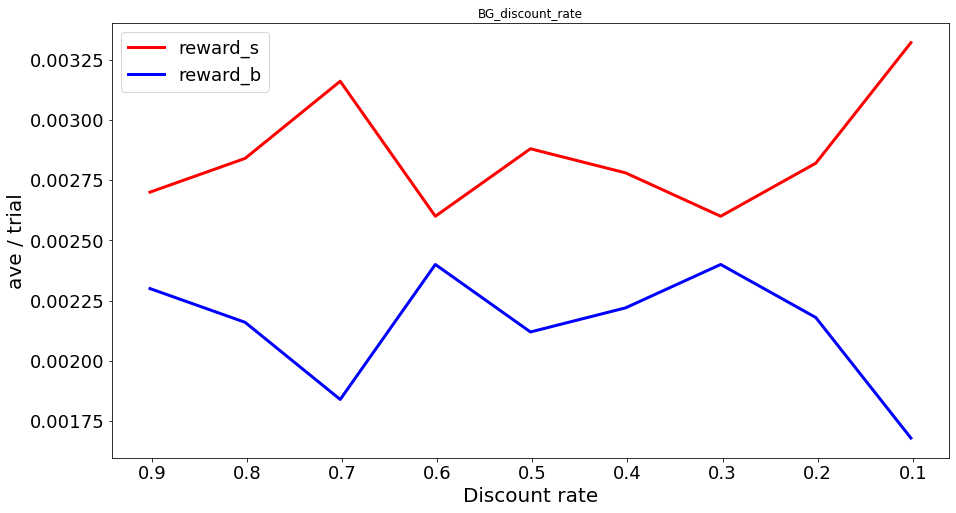

In [11]:
import matplotlib.pyplot as plt

x = np.arange(9)
w = 0.04
t = np.arange(1,10) * 0.1


plt.figure(figsize=(15,8))
plt.plot(x, after_50_1/5e4, color='red', label='reward_s', linewidth=3)
plt.plot(x, after_50_2/5e4, color='blue', label='reward_b', linewidth=3)


plt.xticks(x + w / 2, ['0.9', '0.8', '0.7', '0.6', '0.5', '0.4', '0.3', '0.2', '0.1'])
plt.tick_params(labelsize=18)
plt.title('BG_discount_rate')
plt.xlabel('Discount rate', fontsize=20)
plt.ylabel('ave / trial', fontsize=20)
plt.legend(fontsize=18)
plt.show()

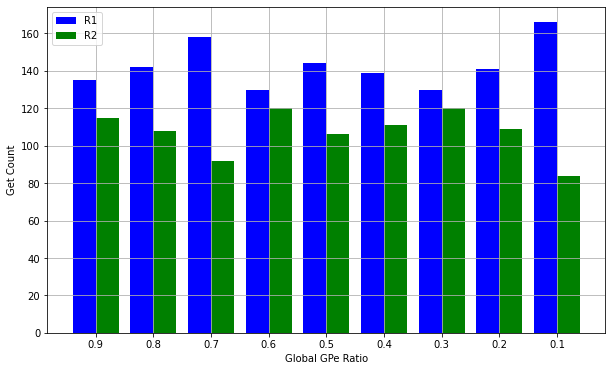

In [12]:
import matplotlib.pyplot as plt

# X軸のデータ
x = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

# グラフの幅
w = 0.04

# グラフの大きさ指定
plt.figure(figsize = (10, 6))

# グラフの描画。y2の方はグラフの幅の分、右にずらして描画する 
plt.bar(x, after_50_1, color = 'blue', width = w, label = 'R1', align = 'center')
plt.bar(x + w, after_50_2, color='green', width = w, label = 'R2', align = 'center')

# 凡例を最適な位置に配置
plt.legend(loc = 'best')

plt.xticks(x + w / 2, ['0.9', '0.8', '0.7', '0.6', '0.5', '0.4', '0.3', '0.2', '0.1'])
plt.xlabel('Global GPe Ratio')
plt.ylabel('Get Count')
plt.grid(True)

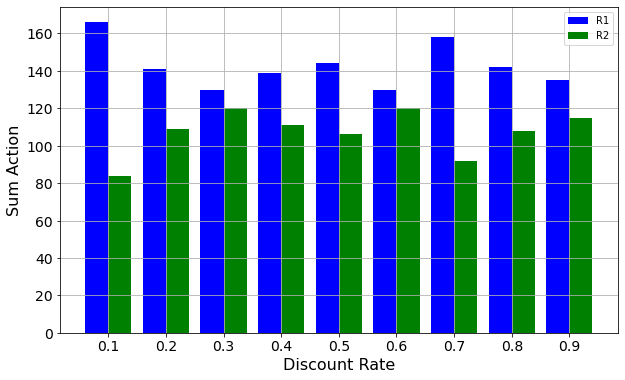

In [13]:
import matplotlib.pyplot as plt

# X軸のデータ
x = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

# グラフの幅
w = 0.04

# グラフの大きさ指定
plt.figure(figsize = (10, 6))

# グラフの描画。y2の方はグラフの幅の分、右にずらして描画する 
plt.bar(x, after_50_1[::-1], color = 'blue', width = w, label = 'R1', align = 'center')
plt.bar(x + w, after_50_2[::-1], color='green', width = w, label = 'R2', align = 'center')

# 凡例を最適な位置に配置
plt.legend(loc = 'best')

plt.xticks(x + w / 2, ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9'], fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Discount Rate', fontsize=16)
plt.ylabel('Sum Action', fontsize=16)

plt.grid(True)

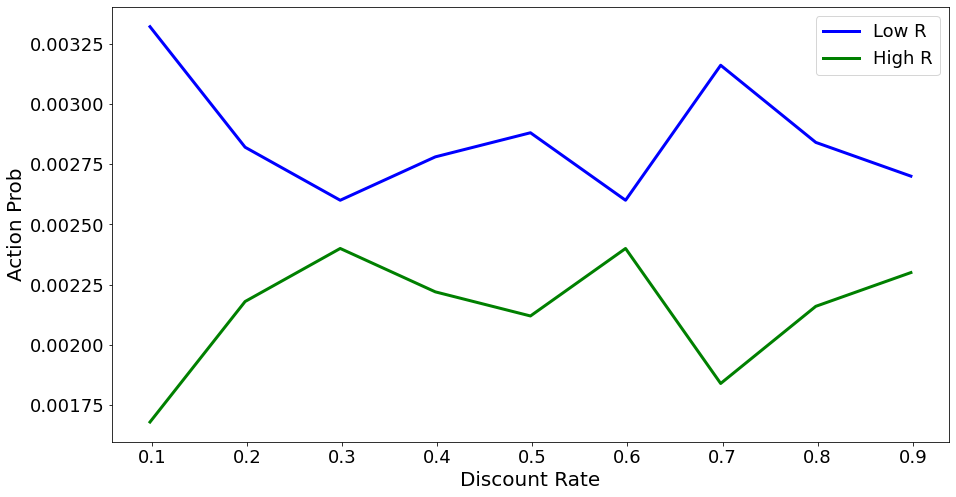

In [14]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(9)
w = 0.04
t = np.arange(1,10) * 0.1
ave_bg1 = after_50_1[::-1]/5e4
ave_bg2 = after_50_2[::-1]/5e4
sigma_bg1 = np.std(after_50_1[::-1], axis=0)
sigma_bg2 = np.std(after_50_2[::-1], axis=0)

plt.figure(figsize=(15,8))
plt.plot(x, after_50_1[::-1]/5e4, color='blue', label='Low R', linewidth=3)
# plt.fill_between(x, ave_bg1+sigma_bg1, ave_bg1-sigma_bg1, facecolor='blue', alpha=0.3)
plt.plot(x, after_50_2[::-1]/5e4, color='green', label='High R', linewidth=3)
# plt.fill_between(x, ave_bg2+sigma_bg2, ave_bg2-sigma_bg2, facecolor='green', alpha=0.3)

plt.xticks(x + w / 2, ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9'])
plt.tick_params(labelsize=18)
# plt.title('BG_discount_rate')
plt.xlabel('Discount Rate', fontsize=20)
plt.ylabel('Action Prob', fontsize=20)
plt.legend(fontsize=18)
plt.show()

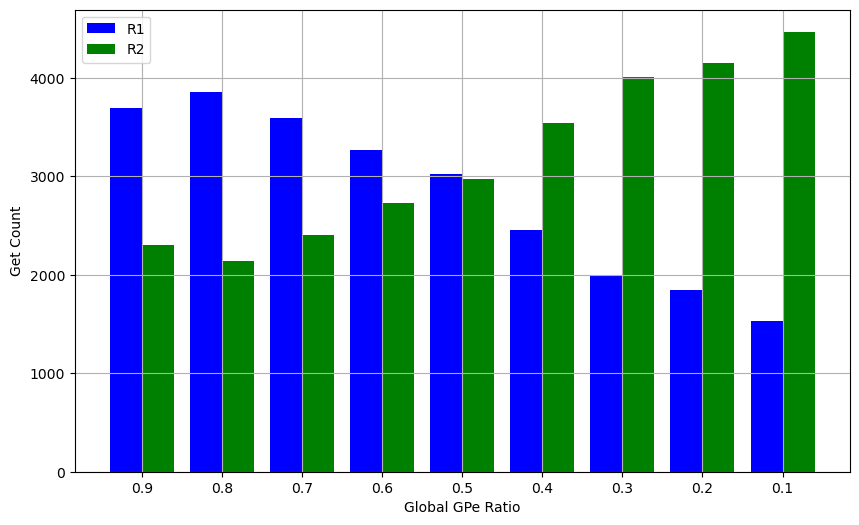

In [5]:
# グラフの大きさ指定
plt.figure(figsize = (10, 6))

# グラフの描画。y2の方はグラフの幅の分、右にずらして描画する 
plt.bar(x, ff1[::-1], color = 'blue', width = w, label = 'R1', align = 'center')
plt.bar(x + w, ff2[::-1], color='green', width = w, label = 'R2', align = 'center')

# 凡例を最適な位置に配置
plt.legend(loc = 'best')

plt.xticks(x + w / 2, ['0.9', '0.8', '0.7', '0.6', '0.5', '0.4', '0.3', '0.2', '0.1'])
plt.xlabel('Global GPe Ratio')
plt.ylabel('Get Count')
plt.grid(True)

[[8. 7. 6. 5. 4. 5. 6.]
 [7. 6. 5. 4. 3. 4. 5.]
 [6. 5. 4. 3. 2. 3. 4.]
 [5. 4. 3. 2. 1. 2. 3.]
 [4. 3. 2. 1. 0. 1. 2.]
 [5. 4. 3. 2. 1. 2. 3.]
 [6. 5. 4. 3. 2. 3. 4.]]


<AxesSubplot:>

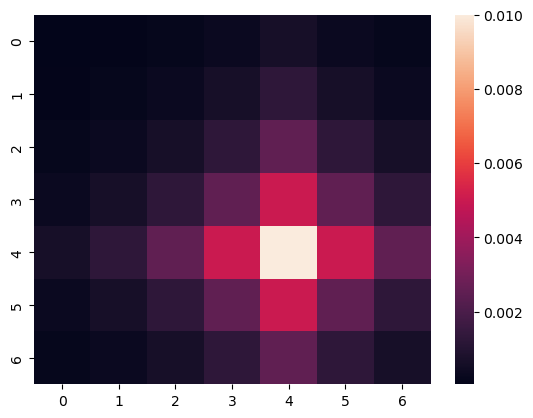

In [12]:
import numpy as np
import seaborn as sns

maze = np.zeros(49).reshape(7, 7)
s = [4, 4]
distance = np.zeros(49).reshape(7, 7)
for i in range(maze.shape[0]):
            for j in range(maze.shape[1]):
                a = np.array(s)
                b = np.array([i, j])
                c = b - a
                distance[i, j] = int(np.linalg.norm(c, ord=1))
                maze[i, j] += 0.01 * (0.5 ** distance[i, j])
print(distance)
sns.heatmap(maze)

In [13]:
import numpy as np

a = np.array([1,2,3])
b = np.array([1,2,3])
c = np.array([])
d = np.zeros([9,200])
print(a+b)
print(c)
print(d)

[2 4 6]
[]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.


# ここからQ

In [131]:
# パッケージのインポート
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import animation
from IPython.display import HTML
import seaborn as sns
from scipy.special import softmax
from tqdm import tqdm
import math

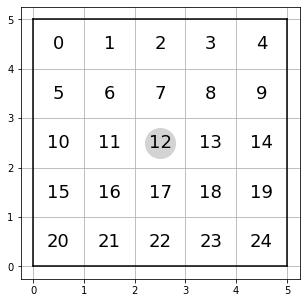

In [132]:
# 迷路の作成
fig = plt.figure(figsize=(5, 5))

# 壁
plt.plot([0, 5], [5, 5], color='k')
plt.plot([0, 5], [0, 0], color='k')
plt.plot([0, 0], [0, 5], color='k')
plt.plot([5, 5], [0, 5], color='k')

for i in range(5):
    for j in range(5):
        plt.text(0.5+i, 4.5-j, str(i+j*5), size=18, ha='center', va='center')

# 円
circle, = plt.plot([2.5], [2.5], marker='o', color='#d3d3d3', markersize=30)

# 目盛りと枠の非表示
plt.tick_params(axis='both', which='both', bottom='False', top= '',
        labelbottom='True', right='', left='False', labelleft='True')
plt.box('off')
plt.xticks(np.arange(0, 6, 1))
plt.yticks(np.arange(0, 6, 1))
plt.grid('True')

In [133]:
# パラメータθの初期値の準備
# 上, 右, 下, 左
theta_0 = np.array([
    [np.nan, 1, 1, np.nan], [np.nan, 1, 1, 1], [np.nan, 1, 1, 1], [np.nan, 1, 1, 1], [np.nan, np.nan, 1, 1],
    [1, 1, 1, np.nan],      [1, 1, 1, 1],      [1, 1, 1, 1],      [1, 1, 1, 1],      [1, np.nan, 1, 1],
    [1, 1, 1, np.nan],      [1, 1, 1, 1],      [1, 1, 1, 1],      [1, 1, 1, 1],      [1, np.nan, 1, 1],
    [1, 1, 1, np.nan],      [1, 1, 1, 1],      [1, 1, 1, 1],      [1, 1, 1, 1],      [1, np.nan, 1, 1],
    [1, 1, np.nan, np.nan], [1, 1, np.nan, 1], [1, 1, np.nan, 1], [1, 1, np.nan, 1], [1, np.nan, np.nan, 1]])


    

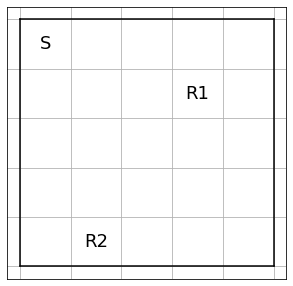

In [141]:
# スタート地点、報酬の場所と大きさ、エピソード数、エポック数を指定
start = 0
R1_spot = 8
R1_size = 1
R2_spot = 21
R2_size = 3
episode_count = 300
epoch_count = 200

# r1 = 1
# r2 = 2
# R1_size = (r1 / (r1 + r2))
# R2_size = (r2 / (r1 + r2))

plt.figure(figsize=(5, 5))

# 壁
plt.plot([0, 5], [5, 5], color='k')
plt.plot([0, 5], [0, 0], color='k')
plt.plot([0, 0], [0, 5], color='k')
plt.plot([5, 5], [0, 5], color='k')

# スタート地点、報酬の場所と大きさを表示
plt.text(0.5 + start%5, 4.5 - int(start/5), 'S', size=18, ha='center', va='center')
# plt.text(0.5 + R1_spot%5, 4.5 - int(R1_spot/5), 'R1=' + str(R1_size), size=10, ha='center', va='center')
# plt.text(0.5 + R2_spot%5, 4.5 - int(R2_spot/5), 'R2=' + str(R2_size), size=10, ha='center', va='center')
plt.text(0.5 + R1_spot%5, 4.5 - int(R1_spot/5), 'R1', size=18, ha='center', va='center')
plt.text(0.5 + R2_spot%5, 4.5 - int(R2_spot/5), 'R2', size=18, ha='center', va='center')

# 目盛りと枠の非表示
plt.tick_params(axis='both', which='both', bottom='', top= '', labelbottom='', right='', left='', labelleft='')
plt.grid('True')

In [142]:
# パラメータθを方策に変換
def get_pi(theta):
    # 割合の計算
    [m, n] = theta.shape
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :])
    pi = np.nan_to_num(pi)  
    return pi

# 行動価値関数の準備
# def action_value(theta_0):
#     [a, b] = theta_0.shape
#     Q = np.random.rand(a, b) * theta_0 * 0.01
#     #print(Q)
#     return Q

def action_value(theta_0):
    Q = theta_0 * 0.0
    return Q

# 行動に従って次の状態を取得
def get_s_next(s, a):
    if a == 0:   # 上
        return s - 5
    elif a == 1: # 右
        return s + 1
    elif a == 2: # 下
        return s + 5
    elif a == 3: # 左
        return s - 1
    
def judge_action(s, a):
    if a == 0:   # 上
        s = s - 5
    elif a == 1: # 右
        s = s + 1
    elif a == 2: # 下
        s = s + 5
    elif a == 3: # 左
        s = s - 1
    
    if s>24 or s<0:
        return True
    else:
        return False
    
    
# ランダムまたは行動価値関数に従って行動を取得
def get_a(s, Q, epsilon, pi_0, gamma):
    beta = 0.1
    if np.random.rand() < epsilon:    # ランダムに行動を選択
        return np.random.choice([0, 1, 2, 3], p=pi_0[s])
    
    else:    # 行動価値関数で行動を選択
        # softmax
        Q[8]  = 1
        Q[21] = 3
        
        u = s-5
        r = s+1
        d = s+5
        l = s-1
                
        u_list = [-5,-4,-3,-2,-1]
        r_list = [5,10,15,20,25]
        d_list = [25,26,27,28,29]
        l_list = [-1,4,9,14,19]
        
        if u in u_list:
            u_V = math.nan
        else:
            u_V = np.nanmax(Q[u])
            
        if r in r_list:
            r_V = math.nan
        else:
            r_V = np.nanmax(Q[r])    
      
        if d in d_list:
            d_V = math.nan
        else:
            d_V = np.nanmax(Q[d])
        
        if l in l_list:
            l_V = math.nan
        else:
            l_V = np.nanmax(Q[l])

#         V = np.array([u_V, r_V, d_V, l_V])

# #         xx = np.nan_to_num(Q[s] * (1 + 0.001 * ep * int(ep/10)) * (1 + 0.01 * ep * int(ep/20)) * (1 + int(ep/280) * 10))
#         xx = np.nan_to_num(V*(1 + (0.001*ep*int(ep/10))) * (1+(0.01*ep*int(ep/20))) * (1+(int(ep/280))*10))

#         c = np.max(xx)
#         exp_x = np.exp(beta*(xx - c))
#         sum_exp_x = np.sum(exp_x)
#         prob = exp_x / sum_exp_x
        
#         action = np.random.choice([0, 1, 2, 3], p=prob)
#         while True:
#             judge = judge_action(s, action)
#             if judge:
#                 action = np.random.choice([0, 1, 2, 3], p=prob)
#             else:
#                 break
                
        V = np.array([u_V, r_V, d_V, l_V])

        prob = softmax(np.nan_to_num(V*((1 + (0.001*ep*int(ep/10)))*(1+(0.01*ep*int(ep/20)))*(1+(int(ep/280))*10)), nan=-np.inf))
#         prob = softmax(np.nan_to_num(Q[s]*((1 + (0.001*ep*int(ep/10)))*(1+(0.01*ep*int(ep/20)))*(1+(int(ep/280))*10)), nan=-np.inf))
        action =  np.random.choice([0, 1, 2, 3], p=prob)
                               
        return action

In [143]:
# Q学習による行動価値関数の更新
def q_learning(s, a, r, s_next, a_next, Q, gamma):
    eta = 0.1 # 学習係数
    
    if s_next == R1_spot:
        Q[s, a] = Q[s, a] + eta * (r - Q[s, a])
    elif s_next == R2_spot:
        Q[s, a] = Q[s, a] + eta * (r - Q[s, a])
    else:
        Q[s, a] = Q[s, a] + eta * (r + gamma * np.nanmax(Q[s_next, :]) -  Q[s, a])
    return Q

In [144]:
# 1エピソードの実行
def play(Q, epsilon, pi, x_list, gamma, a_list):
    s = start # 状態
    a_next = get_a(s, Q, epsilon, pi, gamma) # 行動の初期値
    s_a_history = [[0, np.nan]] # 状態と行動の履歴

    x_list[s] += 1 

    # エピソード完了までループ
    while True:
        # 行動に従って次の状態の取得
        a = a_next
        s_next = get_s_next(s, a)

        # 履歴の更新
        s_a_history[-1][1] = a
        s_a_history.append([s_next, np.nan])
        x_list[s_next] += 1 # そのマスに訪れた回数を +1
        a_list += 1 # 移動回数を +1
        # 報酬の大きさを指定
        if s_next == R1_spot:
            r = R1_size
            a_next = np.nan
        elif s_next == R2_spot:
            r = R2_size
            a_next = np.nan
        else:
            r = 0
            # 行動価値関数Qに従って行動の取得
            a_next = get_a(s_next, Q, epsilon, pi, gamma)
            
        # 行動価値関数の更新
        Q = q_learning(s, a, r, s_next, a_next, Q, gamma) # Q学習

        # 終了判定
        if s_next == R1_spot:
            break
        elif s_next == R2_spot:
            break
        else:
            s = s_next

    # 履歴と行動価値関数を返す
    return [s_a_history, Q, x_list, s_next, a_list]

In [145]:
gamma = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

len_gamma = len(gamma)
flg1 = np.zeros([len_gamma])
flg2 = np.zeros([len_gamma])

x_lists = [[[0]*5]*5]*len_gamma
recent_x_lists = [[[0]*5]*5]*len_gamma
a_lists = [[0]*episode_count]*len_gamma
reward_fig1 = np.zeros([len_gamma,200,300])
reward_fig2 = np.zeros([len_gamma,200,300])
    
for epoch in tqdm(range(epoch_count)):
    for i in range(len(gamma)):
        # パラメータθの初期値を方策に変換
        pi_0 = get_pi(theta_0)
        Q = action_value(theta_0)
        
        x_list = np.zeros([25])
        recent_x_list = np.zeros([25])
        a_list = np.zeros([episode_count])

        epsilon = 0.5  # ε-greedy法のεの初期値

        # エピソードを繰り返し実行して学習
        for ep in range(episode_count):            
            # ε-greedyの値を少しずつ小さくする
            epsilon = 0.5 * (1 / (ep + 1e-8))
            # エピソードのラスト1回ぶんだけ抽出
            if ep < episode_count - 1:
                [s_a_history, Q, x_list, s_next, a_list[ep]] = play(Q, epsilon, pi_0, x_list, gamma[i], a_list[ep])
            else:
                [s_a_history, Q, recent_x_list, s_next, a_list[ep]] = play(Q, epsilon, pi_0, recent_x_list, gamma[i], a_list[ep])
                x_list += recent_x_list

            # 学習終了時点での終了状態を足し上げ
            if s_next == R1_spot:
                reward_fig1[i][epoch][ep] = 1
            if s_next == R2_spot:
                reward_fig2[i][epoch][ep] = 1

        # γ毎に1エポックぶんずつ足し上げ
        x_lists[i] += x_list.reshape(5, 5)
        recent_x_lists[i] += recent_x_list.reshape(5, 5)
        a_lists[i] += a_list
        
        x = np.arange(1, episode_count+1, 1) #そのグラフを表示
        y = a_list
#         y = np.mean(self.A_list, axis=0)
#         plt.figure(figsize=(8, 4))
#         plt.plot(x, y, label='Label')
#         plt.legend()
#         plt.title('Change the number of actions')
#         plt.xlabel('Episode')
#         plt.ylabel('The number of actions')
#         plt.grid(True)
#         plt.show()
        
#         sns.heatmap(x_list.reshape(5,5), annot=False, square=True, cmap='Greens') #遷移回数のヒートマップを表示
#         plt.show()
        
'''
# X軸のデータ
x = gamma

# グラフの幅
w = 0.04

# グラフの大きさ指定
plt.figure(figsize = (10, 6))

# グラフの描画。y2の方はグラフの幅の分、右にずらして描画する 
plt.bar(x, flg1, color = 'blue', width = w, label = 'R1', align = 'center')
plt.bar(x + w, flg2, color='green', width = w, label = 'R2', align = 'center')

# 凡例を最適な位置に配置
plt.legend(loc = 'best')

plt.xticks(x + w / 2, ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9'])
plt.xlabel('Gamma')
plt.ylabel('Get Count')
# X軸のデータ
x = gamma

# グラフの幅
w = 0.04plt.grid(True)
'''

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [08:24<00:00,  2.52s/it]


"\n# X軸のデータ\nx = gamma\n\n# グラフの幅\nw = 0.04\n\n# グラフの大きさ指定\nplt.figure(figsize = (10, 6))\n\n# グラフの描画。y2の方はグラフの幅の分、右にずらして描画する \nplt.bar(x, flg1, color = 'blue', width = w, label = 'R1', align = 'center')\nplt.bar(x + w, flg2, color='green', width = w, label = 'R2', align = 'center')\n\n# 凡例を最適な位置に配置\nplt.legend(loc = 'best')\n\nplt.xticks(x + w / 2, ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9'])\nplt.xlabel('Gamma')\nplt.ylabel('Get Count')\n# X軸のデータ\nx = gamma\n\n# グラフの幅\nw = 0.04plt.grid(True)\n"

In [146]:
import numpy as np

after_50_q1 = []
after_50_q2 = []

for i in range(9):
    tmp1 = 0
    tmp2 = 0
    for j in range(200):
        cal1 = np.sum(reward_fig1[i][j][50:])
        cal2 = np.sum(reward_fig2[i][j][50:])
        tmp1 += cal1
        tmp2 += cal2
        
    after_50_q1.append(tmp1)
    after_50_q2.append(tmp2)
    
after_50_q1 = np.array(after_50_q1)
after_50_q2 = np.array(after_50_q2)

print(after_50_q1)
print(after_50_q2)

[47310. 47708. 47056. 13778.  6496.  2853.  2341.  1038.  1045.]
[ 2690.  2292.  2944. 36222. 43504. 47147. 47659. 48962. 48955.]


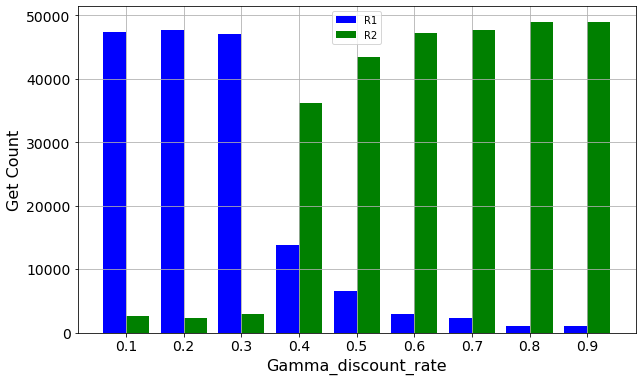

In [147]:
# X軸のデータ
x = gamma

# グラフの幅
w = 0.04

plt.figure(figsize = (10, 6))

# グラフの描画。y2の方はグラフの幅の分、右にずらして描画する 
plt.bar(x, after_50_q1, color = 'blue', width = w, label = 'R1', align = 'center')
plt.bar(x + w, after_50_q2, color='green', width = w, label = 'R2', align = 'center')

# 凡例を最適な位置に配置
plt.legend(loc = 'best')

plt.xticks(x + w / 2, ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9'], fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Gamma_discount_rate', fontsize=16)
plt.ylabel('Get Count', fontsize=16)
plt.grid(True)

### 標準偏差算出用

In [149]:
import numpy as np

std_list_q1 = np.zeros([200,9])
std_list_q2 = np.zeros([200,9])

for i in range(9):
    for j in range(200):
        std_list_q1[j][i] = sum(reward_fig1[i][j][100:])
        std_list_q2[j][i] = sum(reward_fig2[i][j][100:])

for i in range(40):
    print(std_list_q1[199-i])

std_list_q1 = std_list_q1 / 200
std_list_q2 = std_list_q2 / 200

ave_q1 = np.mean(std_list_q1, axis=0)
ave_q2 = np.mean(std_list_q2, axis=0)

sigma_q1 = np.std(std_list_q1, axis=0)
sigma_q2 = np.std(std_list_q2, axis=0)



[196. 199. 193.  31.   0.   0.   0.   0.   0.]
[198. 195. 199.  10.   0.   0.   0.   0.   0.]
[196. 200. 194.   9.   0.   0.   0.   0. 200.]
[197. 198. 198.   2.   0.   0.   0.   0.   0.]
[195. 199. 200.   4.   2. 200.   0.   0.   0.]
[198. 199. 198. 199.   0.   0.   0.   0.   0.]
[195. 200. 200. 200. 200.   0.   0.   0.   0.]
[196. 197. 197.   0.   0.   0.   0.   0.   0.]
[197. 198. 193.   7.   0.   0.   0.   0.   0.]
[195. 199. 199.   0.  29.   0.   0.   0.   0.]
[199. 197. 194.   8.   2.   0.   0.   0.   0.]
[195. 199. 198. 200.   1.   0.   0. 200.   0.]
[198. 199. 200.   7.   1.   0.   0.   0.   0.]
[196. 199. 197. 199.   0.   0.   0.   0.   0.]
[196. 196. 200.  19.   1.   0.   0.   0.   0.]
[191. 198. 199. 198.   0.   0.   0.   0.   0.]
[194. 198. 199.   0.   3.   0.   0.   0.   0.]
[195. 199. 199.  38.   0.   0.   0.   0.   0.]
[197. 198. 200.   0.  10. 200.   0.   0.   0.]
[195. 198. 199.   5.   1.   0.   0.   0.   0.]
[199. 199. 199.   0.   1.   0.   0.   0.   0.]
[197. 197. 19

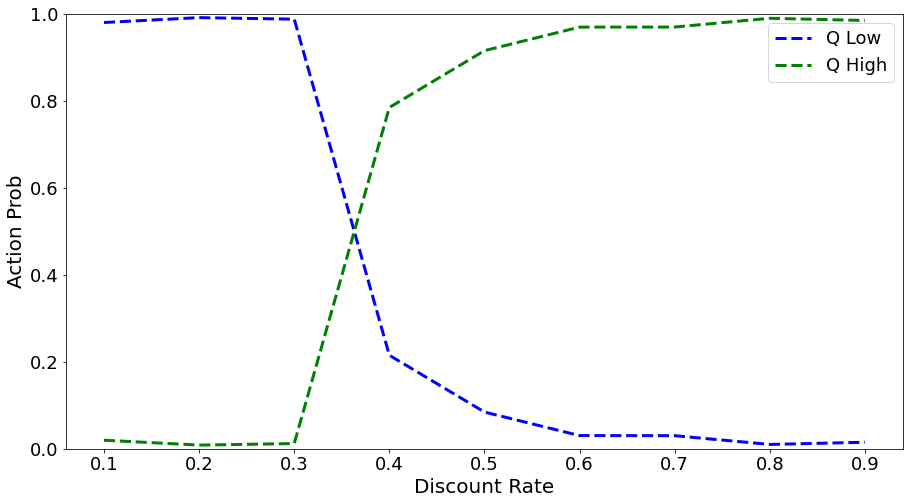

In [151]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(9)
w = 0.04

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(x, ave_bg1, lw=3, color='blue', label='BG Low')

ax.plot(x, ave_bg2, lw=3, color='green', label='BG High')

ax.plot(x, ave_q1, lw=3, color='blue', label='Q Low', linestyle='dashed')

ax.plot(x, ave_q2, lw=3, color='green', label='Q High', linestyle='dashed')

ax.set_xticks([0,1,2,3,4,5,6,7,8])
ax.set_xticklabels(['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9'])

ax.set_ylim(0,1)
ax.tick_params(labelsize=18)
ax.set_xlabel('Discount Rate', fontsize=20)
ax.set_ylabel('Action Prob', fontsize=20)
ax.legend(fontsize=18)

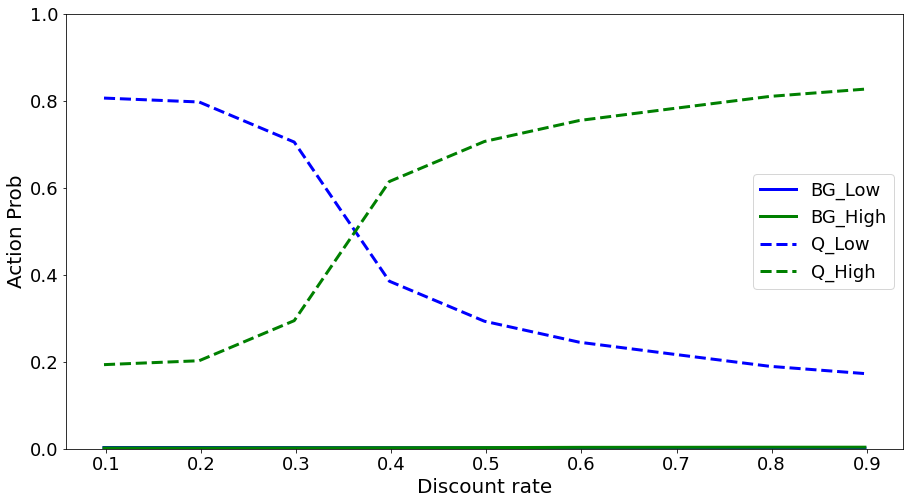

In [47]:
import matplotlib.pyplot as plt

x = np.arange(9)
w = 0.04
t = np.arange(1,10) * 0.1


plt.figure(figsize=(15,8))
plt.plot(x, after_50_1[::-1]/5e4, color='blue', label='BG_Low', linewidth=3) # 50,000episodeの平均goal割合(low_reward)
plt.plot(x, after_50_2[::-1]/5e4, color='green', label='BG_High', linewidth=3) 
plt.plot(x, after_50_q1/5e4, color='blue', label='Q_Low', linewidth=3, linestyle='dashed')
plt.plot(x, after_50_q2/5e4, color='green', label='Q_High', linewidth=3, linestyle='dashed')


plt.xticks(x + w / 2, ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9'])
plt.tick_params(labelsize=18)
plt.ylim(0,1)
# plt.title('BG_discount_rate')
plt.xlabel('Discount rate', fontsize=20)
plt.ylabel('Action Prob', fontsize=20)
plt.legend(fontsize=18)
plt.show()